# Grove Temperature Sensor example

----
* [Introduction](#Introduction)
* [Setup the board](#Setup-the-board)
* [Setup the sensor](#Setup-the-sensor)
* [Read from the sensor](#Read-from-the-sensor)
* [Display a graph](#Display-a-graph)

----
## Introduction


The PYNQ-Z1 and PYNQ-Z2 boards have two Pmod ports and an Arduino interface. The PYNQ-Z2 also has a Raspberry Pi interface. A number of Pmod, Grove, and  Peripherals are supported by PYNQ. 

The external pins of these interfaces are connected to PL pins. This means the logic to control an external peripheral must be implemented in the PL in an Overlay. Pmods, Grove and Arduino peripherals can be used with IOPs in the *base* Overlay for the PYNQ-Z1 and PYNQ-Z2. 

This notebook will show how to use the [Grove Temperature Sensor v1.2](http://www.seeedstudio.com/wiki/Grove_-_Temperature_Sensor_V1.2) with the Grove ADC [Grove Temperature Sensor v1.2](http://wiki.seeedstudio.com/Grove-I2C_ADC/) on the PYNQ-Z1 or PYNQ-Z2 board. The Grove Temperature sensor produces an analog signal, and requires an ADC. You will also see how to plot a graph using _matplotlib_, a Python package for 2D plots. 

A Grove Temperature sensor, a Grove ADC, and a Pynq Grove Adapter Adapter are required for this notebook example (a Pynq Arduino adapter could also be used instead of the Pynq Grove Adapter).

The driver for the Temperature sensor running on the IOP supports reading a single value of temperature, or reading and logging of multiple values at regular intervals.

----
## Setup the board

Start by loading the Base Overlay.

In [1]:
from pynq.overlays.base import BaseOverlay
base = BaseOverlay("base.bit")

## Setup the sensor
1. Connect the [BaseShiled_V2](https://www.seeedstudio.com/Base-Shield-V2.html) are required. to ***PYNQ-Z2***. 
2. Connect ***Grove ADC*** port ***J1*** (SCL, SDA, VCC, GND) to port **I2C*** of the BaseShiled_V2. 
3. Connect the ***Grove TMP*** to port ***J2*** of the ***Grove ADC*** (GND, VCC, NC, SIG)


### Create an instance of the sensor
The sensor is connected to the ADC. You will create an instance of the temperature sensor. 

The Grove ADC is connected to the board through the Pynq Grove adapter. This can be connected to either of the Pmod ports. The Grove ADC is an I2C peripheral. I2C requires pull-up pins on the FPGA. In the base overlay, these pins are only available on ports G3 or G4 of the Pynq Grove adapter, so the ADC must be connected to one of these ports. The Pmod port (PMODA, or PMODB), and the pins on the adapter are specified when the instance is created.

In [6]:
import math
from pynq.lib.arduino import Grove_TMP
from pynq.lib.arduino import ARDUINO_GROVE_I2C # import constants

tmp = Grove_TMP(base.ARDUINO, ARDUINO_GROVE_I2C)

## Read from the sensor
Internally, the Grove ADC provides a raw sample which is the resistance of the sensor. In the IOP, this value is converted into a temperature value.

In [7]:
temperature = tmp.read()
print(float("{0:.2f}".format(temperature)),'degree Celsius')

31.58 degree Celsius


You can run the cell above a number of times.

### Start logging once every 100ms for 10 seconds
Executing the next cell will start logging the temperature sensor values every 100ms, and will run for 10s. You can try touch/hold the temperature sensor to vary the measured temperature.

You can vary the logging interval and the duration by changing the values in the cell below. The raw samples are stored in the internal memory, and converted into temperature values.

In [8]:
import time
ms_delay = 100
delay_s = 10
tmp.set_log_interval_ms(ms_delay)
tmp.start_log()
time.sleep(delay_s) # Change input during this time
tmp_log = tmp.get_log()

----
## Display a graph

Use matplotlib to display a graph of the temperature sensor data.

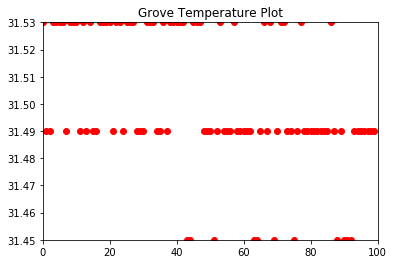

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(tmp_log)), tmp_log, 'ro')
plt.title('Grove Temperature Plot')
min_tmp_log = min(tmp_log)
max_tmp_log = max(tmp_log)
plt.axis([0, len(tmp_log), min_tmp_log, max_tmp_log])
plt.show()